## Basic Definitions: 
- Data Mining: the non-trivial extraction of implicit, previously unknown & potentially useful information from data. Done ia exploration & analysis of large quantities of data to discover meaningful patterns. Synonymous to ML.
- In this introductory course, we'll focus on supervised & unsupervised ML techniques:
- **Supervised Learning**: encompasses algorithms of predictive nature, receiving input data that contain some associated knowledge (aka observed/known values of the variable we're trying to predict) amd produce output values (class predictions, "classifications") that are either discrete (classification algorithms) or continuous (regression algorithms). We try to model (as in estimating the optimal form of a mathematical function) the relationships & dependencies in our labelled data ("training examples") between the values of the dependent variable (y) and the features set (X), so that we can predict the class labels for new data based on those relationships as accurately as possible, aka to achieve optimal "generalization". **[Geometric Interpretation]** These mathematical functions we try to  effectively try to build a boundary (in the form of a curve) between points belonging to various classes that distinguishes them in such a way that results in the optimal generalization performance.
- **Unsupervised Learning**: encompasses algorithms of descriptive nature,m with the goal to unravel hidden trends/patterns evident of (dis)similarities in our data - computers are trained on unlabelled data, so these algos are based on clustering & trend detection techniques so as to better describe the data without human supervision. The goal is to mine for rules, detect patterns, and summarize/group the data points to hlp derive meaningful insights for human interpreters of the results. 

## ML Lifecycle: 
1. Define (based on business needs)
2. Prototype (data acquisition & preparation is where we spend most of our time)
3. Production
4. Measure     


## Titanic - Machine Learning from Disaster - Predicting the Survival of Titanic Passengers


### Load the libraries

In [1]:
import re  # regex will be used for feature extraction out of 'string' columns in the initial dataset 
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option("display.precision", 2)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)  # to ignore warnings about package deprecation and stuff like that
import random

# Pre-processing, model selection and tuning techniques 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics

# Algorithms - Unsupervised Learning
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer


# Algorithms - Supervised Learning - classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC 

In [2]:
import os 
os.chdir('/Users/chkapsalis/Desktop/my_learning/ACG-Deree/Winter_2023:24/ITC6013-Applied_Machine_Learning/Lectures:Slides/w8-revision')

### Load the data

Kaggle’s Titanic Machine Learning Dataset – a classic open-source introduction to the realm of machine learning. The link for the competition and data is https://www.kaggle.com/competitions/titanic. The dataset has information about different passengers on the Titanic ship and their survival. We have the following features in our dataset: 

- survival -> Survival -> 0 = No, 1 = Yes
- pclass -> Ticket class -> 1 = 1st, 2 = 2nd, 3 = 3rd
- sex -> Sex (male/female)
- Age -> Age in years
- sibsp -> # of siblings / spouses aboard the Titanic
- parch -> # of parents / children aboard the Titanic
- ticket -> Ticket number
- fare -> Passenger fare
- cabin -> Cabin number
- embarked -> Port of Embarkment

#### Data Notes 

- As part of the Kaggle competition, based on the patterns you find in titanic_known.csv, you will have to predict whether the other 418 passengers on board in titanic_unknown.csv survived. <u>=> process: pre-process the given data, find what predictive ML model works best on them, and then train it on the ENTIRE titanic_known.csv data (as X_train and y_train), considering the contents of titanic_unknown.csv as X_unknown which you want to get actual predictions you cannot find anywhere else.</u>

**Note that titanic_unknown.csv does not have a "Survived" column - this information is hidden from you, and how well you do at predicting these hidden values will determine how highly you score in the competition!**

In [3]:
# The data in this use case are provided to you as titanic_known.csv and titanic_unknown.csv files. 
# Load both of the files into two new DataFrames titanicData and unknownData respectively
titanicData = pd.read_csv('titanic_known.csv', index_col=0, header=0, sep=',')
unknownData = pd.read_csv('titanic_unknown.csv', index_col=0, header=0, sep=',')
titanicData.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


## Define the type of problem concerned (supervised/unsupervised learning, what type) and, in case of classification, what is the dependent/target/class variable.

<strong>Goal:</strong> given a dataset of values for various attributes/features of passengers of the Titanic, predict whether they survived or not (aka assign a label out of a specified set -those existing in the training set- for a set of new/unseen values/data points/samples). 
=> supervised learning; binary classification problem. 
<strong>Class variable</strong> (bearing -in labeled points- the information we want to predict for the unlabeled points): 'Survived'

# Data Pre-Processing 
We perform data-preprocessing with the goal of improving the quality of our data & making it more suitable for the specific data mining task. Otherwise, giving as input quality of bad quality to any ML algos would just result in getting bad predictions returned; "garbage in, garbage out".

### Inspecting our data 
Aspects considered: 
- Dimensionality/Shape
- Data types of columns and underlying nature of their information (numerical, categorical (encoded vs. not encoded), string, bool) + look for variables stored in wrong data types
- Duplicate values
- Missing values (~of types that NumPy conventionally recognizes as NaN values so that they can be showing in '.info()' calls) - which columns contain them and what my imputation strategy/approach will be per variable

In [4]:
## Dimensionality/Shape

print('Shape of titanicData:', titanicData.shape)
print('Shape of unknownData:', unknownData.shape)


Shape of titanicData: (891, 11)
Shape of unknownData: (418, 10)


We see there is one less column - that is because there is no 'Survived' column in titanic-unknown.csv
We do not know what the fate of those passengers was. This is what we're trying to predict.

### Checking for Duplicate values 
A row is duplicated when we have multiple mentions (>1) to the passenger it refers to - this is easily identifiable by multiple mentions to the specific index value corresponding to that row. 

In [5]:
print('Initial Shape of titanicData:', titanicData.shape)
# Here, the 'key' column (~ each passenger: uniquely identified by a single column, which is actually each row's index) is the index.
# If this wasn't the case, I wouldn't bother the '.reset_index(allow_duplicates=True)' part. 
print('No of duplicate mentions to passengers in titanicData:', titanicData.reset_index(allow_duplicates=True).duplicated(subset=['PassengerId']).sum())
print('No of duplicate mentions to passengers in unknownData:', unknownData.reset_index(allow_duplicates=True).duplicated(subset=['PassengerId']).sum())

Initial Shape of titanicData: (891, 11)
No of duplicate mentions to passengers in titanicData: 0
No of duplicate mentions to passengers in unknownData: 0


Should there be any duplicates we would have to drop them IN THIS CASE, because they could not represent reality, rather just redundant and replicated data (one person can be onboard only one time, there aren't clones of them). This is highly data-dependent though in general; there are cases in which it so happens that there are observations with the exact same characteristics in reality - in such cases we retain duplicate values, as the model being trained should take into account the relative frequencies in which such samples (with their unique characteristics - feature values) are observed in reality.

### Data types and missing values of each column 

In [6]:
# relevant info of titanicData 
titanicData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### Observations 

<strong>Variables of categorical nature:</strong>
- Pclass (encoded)
- Name (not encoded)
- Sex (not)
- Ticket (not) 
- Cabin (not)
- Embarked (not)

<strong>Variables of quantitative/numerical nature:</strong>
- Age 
- SibSp
- Parch
- Fare 

In [7]:
# Missing values per column in titanicData  
print(titanicData.isna().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [8]:
# % of missing values per column containing NaNs
for col in titanicData.columns:
    if titanicData[col].isna().sum() != 0:
        print(f'There are {titanicData[col].isna().sum()} NaN values in column "{col}", or {(titanicData[col].isna().sum()/titanicData[col].shape[0]):.2%} of its values.')


There are 177 NaN values in column "Age", or 19.87% of its values.
There are 687 NaN values in column "Cabin", or 77.10% of its values.
There are 2 NaN values in column "Embarked", or 0.22% of its values.


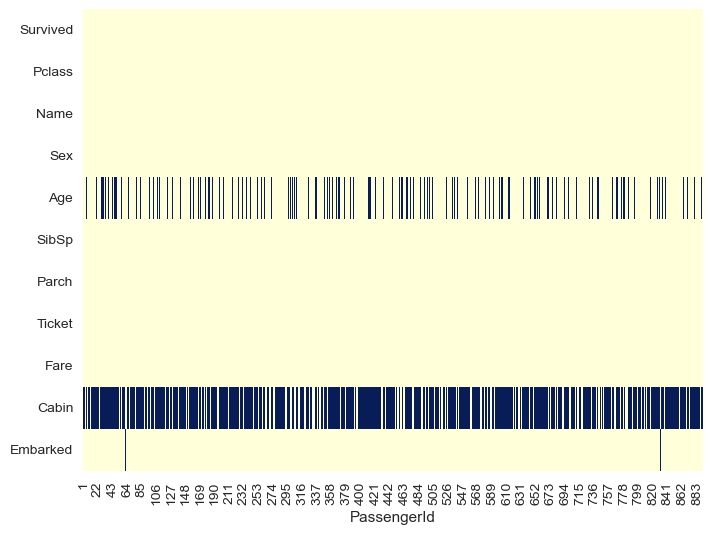

In [9]:
# null values heatmap for titanicData

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(data=titanicData.isna().transpose(), cmap="YlGnBu", cbar=False)
plt.show()

We notice from the above that the known set has missing values in the Age, Cabin and Embarked columns

In [10]:
# relevant info of unknownData 
unknownData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [11]:
# Missing values per column in unknownData 
print(unknownData.isna().sum())

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [12]:
# % of missing values per column containing NaNs
for col in unknownData.columns:
    if unknownData[col].isna().sum() != 0: 
        print(f'There are {unknownData[col].isna().sum()} missing values in "{col}", or {(unknownData[col].isna().sum() / unknownData[col].shape[0]):.2f} of its values are missing')

There are 86 missing values in "Age", or 0.21 of its values are missing
There are 1 missing values in "Fare", or 0.00 of its values are missing
There are 327 missing values in "Cabin", or 0.78 of its values are missing


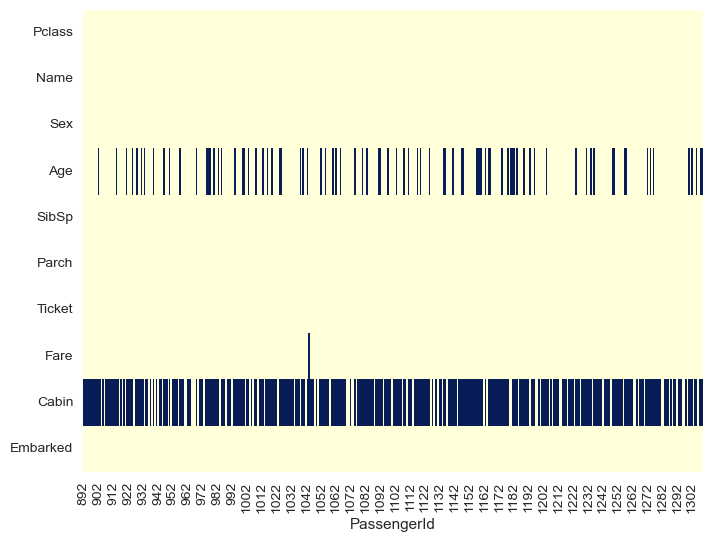

In [13]:
# null values heatmap for unknownData
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(data=unknownData.isna().transpose(), cmap='YlGnBu', cbar=False)
plt.show()

**The unknown set has missing values in Age, Cabin and Fare columns**

I always look for missing values in all features sets I hold (here not only the known/labeled data, but also the unknown which I want to make predictions on - plus I inspect this before even splitting between X_train and X_test, and even before splitting to X and y - <u>missing values in 'y' for the training data => dropna, those data samples are useless in training my model</u>).

I will train imputers for ALL those features on the training data (when initially observing model performance that will be X_train, later it will be the whole X of titanicData), even if the training set contains no missing values on those cols. 

Strategy: 
- Age (numeric) -> a lot of missing values, replacing them with a constant value would significantly distort their distributions => random imputation 
- Fare (numeric) -> very small number of missing values, will just replace with the median of the (known) training set's values
- Embarked (categorical) -> same as fare but categorical variable, so will replace with the mode/most frequent value of the (known) training values

### Feature engineering

#### 1. Handling ID variables
Here we only have one, so I will retain it as the index of the dataframe. If we had more, I would keep the most important - the one that does the best job identifying unique passengers/data points - and drop the rest (or i could even have multiple indexes in my dataframes, but that would perplex handling them by a lot). 

This is important due to the fact that ID variables take numerical values that often have wide ranges; as such, retaining them in our features set would result in algorithms being biased towards them, in the sense that they would have an excessive impact on / contribute more to the learning process, at least with regards to distance-based on gradient descent-based models. 

In [14]:
# When importing the 'titanic_known.csv' dataset into a pandas dataframe, I made sure these values were passed in
# as the index of the dataframe. 
# Of course I did the exact same thing in 'titanic_unknown.csv'.

#### 2. Feature Creation

##### Extracting the <strong><u>Titles</u></strong> of passengers out of their names. 
I see that they are consisted of consecutive characters ending with '.'.
So we could use the 'Name' feature and regular expressions to extract the new feature out of that.

In [15]:
titanicData['Title'] = ''
unknownData['Title'] = ''

for i in titanicData:
    titanicData['Title'] = titanicData.Name.str.extract('([A-Za-z]+)\.') 

for i in unknownData:
    unknownData['Title'] = unknownData.Name.str.extract('([A-Za-z]+)\.')
    
titanicData.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,Mrs


In [16]:
# Inspect the various titles created, plus their distribution among the sexes in this dataset of passengers on the Titanic
pd.crosstab(index=titanicData['Title'], columns=titanicData['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We see that all titles, except for 'Dr', are sex-specific. However, that does now come in handy for further feature creation based on that, as it would just convey redundant information that is already anyways contained in the 'Sex' column. 

We can replace many titles with a more common name or classify them as a new value 'Other'

In [17]:
for dataset in [titanicData, unknownData]:
    # grouping noble titles together
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')  # not-married woman
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')  # not-married woman
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # + we also have the 'Master' title, denoting a young boy 

titanicData[['Title', 'Survived']].groupby(['Title'], as_index=False).count()

,Title,Survived
0,Master,40
1,Miss,185
2,Mr,517
3,Mrs,126
4,Other,23


##### Extracting the <strong><u>'Deck'</u></strong> that passengers had a cabin on

As a first thought, we can delete the ‘Cabin’ feature but there's something rather interesting. A cabin number looks like ‘C123’ and the letter refers to the deck. Therefore we could extract these and create a new feature, that contains a person's deck. Afterwards, we will convert the feature into a numeric variable. The missing values will be converted to zero. The actual decks of the titanic are ranging from A to G.

In [18]:
# inspecting which cabin letters are included in the test dataset 
cabin_letters = [] 
for i in titanicData.index:
    if not titanicData.loc[i, 'Cabin'] != titanicData.loc[i, 'Cabin']:  # easiest way to see if a value is nan (either np.nan or math.nan)
        cabin_letters.append(titanicData.loc[i,'Cabin'][0])
    else:   
        cabin_letters.append(np.nan)

cabin_letters = pd.Series(cabin_letters, index=titanicData.index)

In [19]:
print(cabin_letters.value_counts())

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64


In [ ]:
# Mapping these letters to numbers
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [titanicData, unknownData]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("X")  # For each dataset, the 'Cabin' column is filled with "X" where there are missing values using the fillna method.
    dataset['Deck']  = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())  # The 'Deck' column is created by extracting the first letter from the 'Cabin' column using a regular expression. This is done using the map function with a lambda function.
    dataset['Deck']  = dataset['Deck'].map(deck)  # The extracted letter is then mapped to its corresponding numerical value from the deck dictionary. 
    dataset['Deck']  = dataset['Deck'].fillna(0)
    dataset['Deck']  = dataset['Deck'].astype(int)

titanicData['Deck'].value_counts()

The new 'Deck' variable is one of numeric nature: higher values actually mean sth and may contribute to the probabiliyty of someone to survive, so we may not encode it. 

##### Extract the <strong><u>FamilySize</u></strong> and whether a passenger <strong><u>IsAlone</u></strong> from 'SibSp' and 'Parch'

SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives a person has on the Titanic. We can create it as follows and also create a feature that shows if someone is not alone.

In [21]:
data = [titanicData, unknownData]

for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1  # '+1' corresponds to themselves for each passenger at hand

titanicData[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).count().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
0,1,537
1,2,161
2,3,102
3,4,29
5,6,22
4,5,15
6,7,12
8,11,7
7,8,6


The smaller the family size, the more likely seems to be for someone to survive such an accident; this could be for example be attributable to the fact that having more family members means they would need to spare a significant of their survival efforts to help others instead of themselves.

In [22]:
for dataset in data:
    dataset['IsAlone'] = 0
    dataset['IsAlone'] = np.where(dataset['FamilySize'] == 1, 1, 0)

titanicData[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).count()

,IsAlone,Survived
0,0,354
1,1,537


#### 3. Dropping useless features: 'Name', 'Ticket' and 'Cabin' columns
The non-Na values of those columns bare no analytical signifcance on their own; they are categorical and have a unique value per passenger. 

<strong><></strong> the same does <strong>NOT</strong> hold true for the numeric variables 'SibSp' and 'Parch' which we retain in our datasets after extracting features off of them - they still bare distinct information that could help explain the variance observed between data points. 

In [23]:
# Drop the features ['Name', 'Ticket','Cabin'] of your titanicData - set the axis accordingly - inplace or with replacement. 
# Preview the first 2 rows of titanicData
for dataset in [titanicData, unknownData]:
    dataset.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)
titanicData.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,FamilySize,IsAlone
PassengerId,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.25,S,Mr,0,2,0
2,1,1,female,38.0,1,0,71.28,C,Mrs,3,2,0


***

### Split to X and y

In [24]:
X = titanicData.drop('Survived', axis=1)
y = titanicData['Survived']

Inspecting the distribution of class labels in y:

In [25]:
print('Distribution of absolute class sizes in y:', y.value_counts(), '\n'*2)
print('Distribution of relative class sizes in y:', y.value_counts(normalize=True))

Distribution of absolute class sizes in y: Survived
0    549
1    342
Name: count, dtype: int64 


Distribution of relative class sizes in y: Survived
0    0.62
1    0.38
Name: proportion, dtype: float64


There are class imbalances we need to take into account - it was far more possible for someone to die (majority) than to survive (minority class).
- do stratified splitting when performing the 'train_test_split' so as to make sure y_test and y_train have the same relative distribution of class labels 
- perform STRATIFIED cross validation when tuning the models (+ specifically for the svm model's case: check if applying different weights on samples pertaining to the different classes improves the model's performance)
- maybe implement sampling techniques
- when assessing the performance of models, check on performance metrics that are robust against class imbalances

(check on our group project as well for some more comprehensive dealing with class imbalances)

**We take into account class imbalances**
Most ML algos used for classification wre designed around the assumption of an equal # of samples for each class. 

If this principle is violated and we do not address it, , the results would be biased towards the majority class. In other terms, the model would be more "eager" to classify samples (new/unseen) as belonging to the majority class than the minority class, and that would lead to poor generalization performance for the minority class (many classification errors for samples belonging to it). This is especially bad because that class is typically more important with regards to our interests which drive us to conduct the analysis. 

**Solution** By stratified validation we take into account the exact imbalances in the given training data for all iterations so as to find the model that performs the best at generalizing under the given imbalances. 

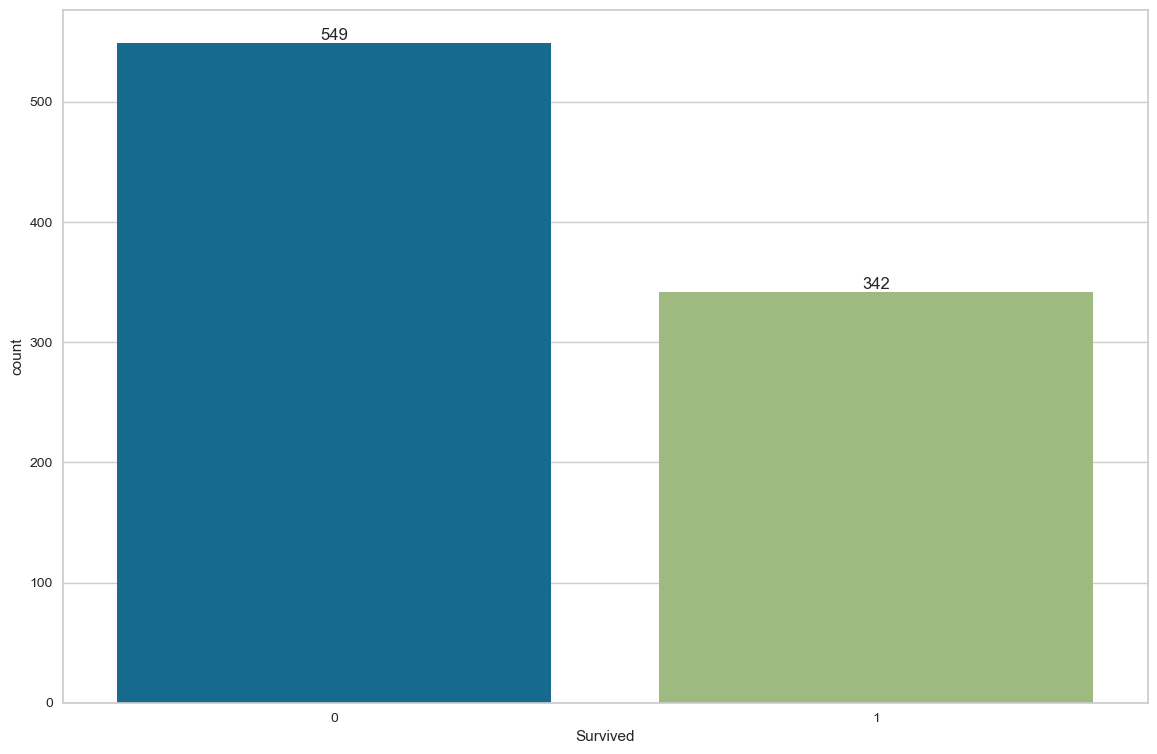

In [26]:
# Visualizing the previous: 
fig, ax = plt.subplots(figsize=(14,9))
ax = sns.countplot(data=titanicData, x='Survived')
ax.bar_label(container=ax.containers[0], labels=y.value_counts(ascending=False))
plt.show()

### Pre-processing on the dependent variable
Class labels are already encoded, so I will not need to use the LabelEncoder class of sklearn to take care of this. 

In case the classes were represented by string/boolean values, I would have to encode them to numerical ones because sklearn ML model implementations require that all input is numeric. 
!!! The approach suggested, i.e. LabelEncoder, is suitable for encoding ONLY the labels of the class variable; doing the same on the columns of the features set would lead to variables taking multiple numeric values (talking about non-binary cases). As a result, ML models would consider those CLASSES as being of different importance in the learning process, according to their numerical values' hierarchy. 
Also, because these encoded VARIABLES would have different ranges (in the non-binary cases), the algorithms would consider them as not contributing the same to explaining the signal in the learning process, which would distort our results. 

***

We are **NOT** using ALL of the available data in the training process. Instead, we implement model validation techniques. In this analysis, we implement a holdout validation technique, the 'train-test-split' approach, which randomly splits the data in our available dataset into two sets, the training set and the testing set, which are disjoint. 

The sets are created in a random way so as to prevent biased/skewed output, and the split also happens in a stratified manner (here under a case of class imbalances) so as to make sure that all cross validation iterations for the models we train take into account the exact imbalances present in the given dataset, so we compare their performance under these exact conditions to find the one best suited to our case. 

The sets are disjoint so as to avoid data leakage, i.e. to avoid passing information from the test set (which is used to assess a model's generalization performance) to the training set (i.e. the set it is used to "learn" upon).

If they weren't disjoint or if no validation happened at all, meaning that we trained the set on the totality of known data and compared its performance for various hyperparameter values on the same data it was trained upon, the model would give deceptively good performance metrics values. <s>That is because it would have some 'hints' on the associations between the data feature values and the class labels in the data it would be called to predict upon, and it would such optimal hyperparameter values so as to maximize its performance on those data.</s>

Thus, we perform model validation so as to prevent overfitting; this is what would happen if we tried to maximize its performance on the whole given dataset. This would occur because the models would capture not only the associations between the features set and the class labels, but they would also get trained on the very noise contained in the dataset we happened to have as available. The hyperparameters would be tuned to such values, therefore, which would lead to good performance on the training set (i.e. low error) but very bad generalization performance (i.e. high error on the testing set and unseen/unknown/new data), since it would effectively just memorize the characteristics of this very specific dataset and repeat them on new/unseen data samples.  

### Train/test split
We will use the sklearn.model_selection.train_test_split function to split the KNOWN data in two datasets: the training set which we'll use to train our models on, and the test set we'll use to check their generalization performance. If we didn't do so, and we checked the performance of the algorithm on the same data it was trained upon, then it would show very good performance because there would be 'data leakage'; it would already have some 'hints' on the associations between the data it would be called to predict upon, so it would do better than it would if it given unknown data. 

Also, by tuning our model on the <strong>whole</strong> KNOWN dataset way we would just overfit the model to it, by making it perform the best on it, ignoring the fact that it would capture not just the signal but also the noise that our specific dataset bares, so it would have bad generalization performance. 

In [27]:
# Use the train_test_split() function from sklearn. Use 30% of your data for the test set. Use stratification if needed. 
# Set random_state=1 (for reproducibility). Print the dimensionality (shape) of X_train, X_test, y_train, y_test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)
# Sanity check passed: X_train and X_test have the same number of cols, and their sum of rows (similarly for y_train and y_test) sums
# up to X.shape[0]

Shape of X_train: (623, 11)
Shape of X_test: (268, 11)
Shape of y_train: (623,)
Shape of y_test: (268,)


***

### Pre-processing on the features set

### 1.Imputing - dealing with missing values

In the case of missing values, we should take care to replace them in the dataset as they prevent machine learning algorithms to run. There are many functions such as `.fillna()` and `.SimpleImputer` from `sklearn` as well as **many strategies** to help with missing data and they depend on whether the missing data is **numeric** or **categorical**.  

What strategy is best for you problem very much depends on the specifics of your dataset. However, generally speaking it is not worth to remove large chunks of data.

- simply removing rows where there is missing data (e.g. `dropna()` can achieve this)
- imputing the values with a summary statistic such as mean or median or most frequent value (e.g. `.fillna()` from `pandas` or `.SimpleImputer()` from `sklearn` module)
- replace the values with a reasonable estimate

In [28]:
# Let's quickly print the NAs per dataset 

print("Nulls in X_train","-"*20)
print(X_train.isnull().sum())

print("Nulls in X_test","-"*20)
print(X_test.isnull().sum())

print("Nulls in unknownData","-"*20)
print(unknownData.isnull().sum())



Nulls in X_train --------------------
Pclass          0
Sex             0
Age           122
SibSp           0
Parch           0
Fare            0
Embarked        2
Title           0
Deck            0
FamilySize      0
IsAlone         0
dtype: int64
Nulls in X_test --------------------
Pclass         0
Sex            0
Age           55
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
Deck           0
FamilySize     0
IsAlone        0
dtype: int64
Nulls in unknownData --------------------
Pclass         0
Sex            0
Age           86
SibSp          0
Parch          0
Fare           1
Embarked       0
Title          0
Deck           0
FamilySize     0
IsAlone        0
dtype: int64


In [29]:
# better show only the number of NAs in columns that actually contain missing values for each dataset:
dataset_names = ["X_train", "X_test", "unknownData"]
datasets = [X_train, X_test, unknownData]
for i in range(len(datasets)):
    dataset = datasets[i]
    print(f'\nNAs in dataset "{dataset_names[i]}":')
    for col in dataset.columns:
        if dataset[col].isna().sum() != 0: 
            print(f'Column "{col}": {dataset[col].isna().sum()}')


NAs in dataset "X_train:"
Column "Age": 122
Column "Embarked": 2

NAs in dataset "X_test:"
Column "Age": 55

NAs in dataset "unknownData:"
Column "Age": 86
Column "Fare": 1


In [32]:
# We will implement the imputation strategy previously defined: 


## Random imputation for 'Age' ## If I had multiple variables I wanted to perform random imputation on, I would just repeat this 
# for all of them - perhaps just create a function 
#################################
# these are the -initially- known/non-null values of X_train
# so I will do the same as fit_transform an imputer on training data and only fitting it on testing data
print("randomise missing data for DataFrame (within a column) based on the distribution of known values in the corresponding col of the training set")
training_data =X_train['Age'][X_train['Age'].isna() == False].values
for dataset in [X_train, X_test, unknownData]:
    data = dataset['Age']
    nulls_in_current_df = data.isna()
    samples = random.choices(training_data, k=nulls_in_current_df.sum())  # random.choices without any arguments respects the distribution of values in the mentioned column
    dataset.loc[nulls_in_current_df[nulls_in_current_df == True].index, 'Age'] = samples


randomise missing data for DataFrame (within a column) based on the distribution of known values in the corresponding col of the training set


In [31]:
training_set = X_train
all_sets_list = [X_train, X_test, unknownData]
col_names = ['Age']

def random_imputation(training_set, all_sets_list, col_names):
    resulting_cols = []
    for col in col_names:
        training_data = training_set[col][training_set[col].isna() == False].values
        for dataset in all_sets_list:
            nulls_in_current_df = dataset[col].isna()
            samples = random.choices(training_data, k=nulls_in_current_df.sum())
            dataset.loc[nulls_in_current_df[nulls_in_current_df == True].index, col] = samples
            resulting_cols.append(dataset[col])
    
    return resulting_cols

resulting_cols = random_imputation(training_set, all_sets_list, col_names)
i = -1 
j = -1
for dataset in all_sets_list:
    i += 1
    for col in col_names:
        j += 1 
        dataset.loc[:, col] = resulting_cols[i+j]

IndexError: list index out of range

In [33]:
# Sanity check
for dataset in [X_train, X_test, unknownData]:
    print(f"Number of missing values in 'Age' column: {dataset['Age'].isna().sum()}")

Number of missing values in 'Age' column: 0
Number of missing values in 'Age' column: 0
Number of missing values in 'Age' column: 0


In [34]:
## Imputing the missing values of the 'Fare' column:
num_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X_train.loc[:, 'Fare'] = num_imputer.fit_transform(np.array(X_train['Fare']).reshape(-1,1))
X_test.loc[:, 'Fare'] = num_imputer.transform(np.array(X_test['Fare']).reshape(-1,1))
unknownData.loc[:, 'Fare'] = num_imputer.transform(np.array(unknownData['Fare']).reshape(-1,1))

# Sanity check - passed
for dataset in [X_train, X_test, unknownData]:
    print(dataset['Fare'].isna().sum())

0
0
0


In [35]:
## Imputing the missing values of the 'Embarked' column:
cat_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_train.loc[:,'Embarked'] = cat_imputer.fit_transform(np.array(X_train['Embarked']).reshape(-1,1))
X_test.loc[:,'Embarked'] = cat_imputer.transform(np.array(X_test['Embarked']).reshape(-1,1))
unknownData.loc[:,'Embarked'] = cat_imputer.transform(np.array(unknownData['Embarked']).reshape(-1,1))

# Sanity check - passed
for dataset in [X_train, X_test, unknownData]:
    print(dataset['Embarked'].isna().sum())

0
0
0


### Convert the categorical features with One-Hot-Encoding (OHE) 
This is necessary since all sklearn's ML models need to be trained on numerical data. We implement the OHE approach so as to make sure that the resulting encoded categorical variables are all of binary nature, so that they are considered by the algorithm as contributing the same to the learning process., and that there is no hierarchy among the labels/values each of them can take. 

Categorical columns to map to numerical values:
- 'Sex' (binary, could as well just do '.map')
- 'Embarked' (same)
- 'Title' -> multiple (>2) values, use get_dummies

In [36]:
# Apply one-hot-encoding (OHE) to the categorical features of X_train using pd.get_dummies: 
X_train_ohe = X_train[['Sex', 'Embarked', 'Title']]
X_train_ohe =pd.get_dummies(X_train_ohe, dtype='int8')
X_train.drop(['Sex', 'Embarked', 'Title'], axis=1, inplace=True)
X_train = X_train.join(X_train_ohe)
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Deck,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
PassengerId,,,,,,,,,,,,,,,,,,
473,2,33.0,1,2,27.75,0,4,0,1,0,0,0,1,0,0,0,1,0
598,3,49.0,0,0,0.00,0,1,1,0,1,0,0,1,0,0,1,0,0
844,3,34.5,0,0,6.44,0,1,1,0,1,1,0,0,0,0,1,0,0
113,3,22.0,0,0,8.05,0,1,1,0,1,0,0,1,0,0,1,0,0
870,3,4.0,1,1,11.13,0,3,0,0,1,0,0,1,1,0,0,0,0


In [37]:
# Similarly, apply one-hot-encoding (OHE) to the categorical features of *X_test* using pd.get_dummies: 
X_test_ohe = X_test[['Sex', 'Embarked', 'Title']]
X_test_ohe =pd.get_dummies(X_test_ohe, dtype='int8')
X_test.drop(['Sex', 'Embarked', 'Title'], axis=1, inplace=True)
X_test = X_test.join(X_test_ohe)
X_test.head()


,Pclass,Age,SibSp,Parch,Fare,Deck,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
PassengerId,,,,,,,,,,,,,,,,,,
434,3,29.0,0,0,7.12,0,1,1,0,1,0,0,1,0,0,1,0,0
222,2,59.0,0,0,13.00,0,1,1,0,1,0,0,1,0,0,1,0,0
218,2,41.0,1,0,27.00,0,2,0,0,1,0,0,1,0,0,1,0,0
377,3,2.0,0,0,7.25,0,1,1,1,0,0,0,1,0,1,0,0,0
448,1,16.0,0,0,26.55,0,1,1,0,1,0,0,1,0,0,1,0,0


In [38]:
# Similarly, apply one-hot-encoding (OHE) to the categorical features of *unknownData* using pd.get_dummies: 
unknownData_ohe = unknownData[['Sex', 'Embarked', 'Title']]
unknownData_ohe =pd.get_dummies(unknownData_ohe, dtype='int8')
unknownData.drop(['Sex', 'Embarked', 'Title'], axis=1, inplace=True)
unknownData = unknownData.join(unknownData_ohe)
unknownData.head()

,Pclass,Age,SibSp,Parch,Fare,Deck,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
PassengerId,,,,,,,,,,,,,,,,,,
892,3,34.5,0,0,7.83,0,1,1,0,1,0,1,0,0,0,1,0,0
893,3,47.0,1,0,7.00,0,2,0,1,0,0,0,1,0,0,0,1,0
894,2,62.0,0,0,9.69,0,1,1,0,1,0,1,0,0,0,1,0,0
895,3,27.0,0,0,8.66,0,1,1,0,1,0,0,1,0,0,1,0,0
896,3,22.0,1,1,12.29,0,3,0,1,0,0,0,1,0,0,0,1,0



#### Check for correlations in the data - Pearson Correlation Heatmap
This will help us understand the need fo dimensionality reduction techniques. 
Here we do not have multiple categorical (and encoded) columns to fear our training matrix being rather sparse, which would also justify dimensionality reduction. Instead, we only inspect the existence of potentially high correlation between numerous variables.

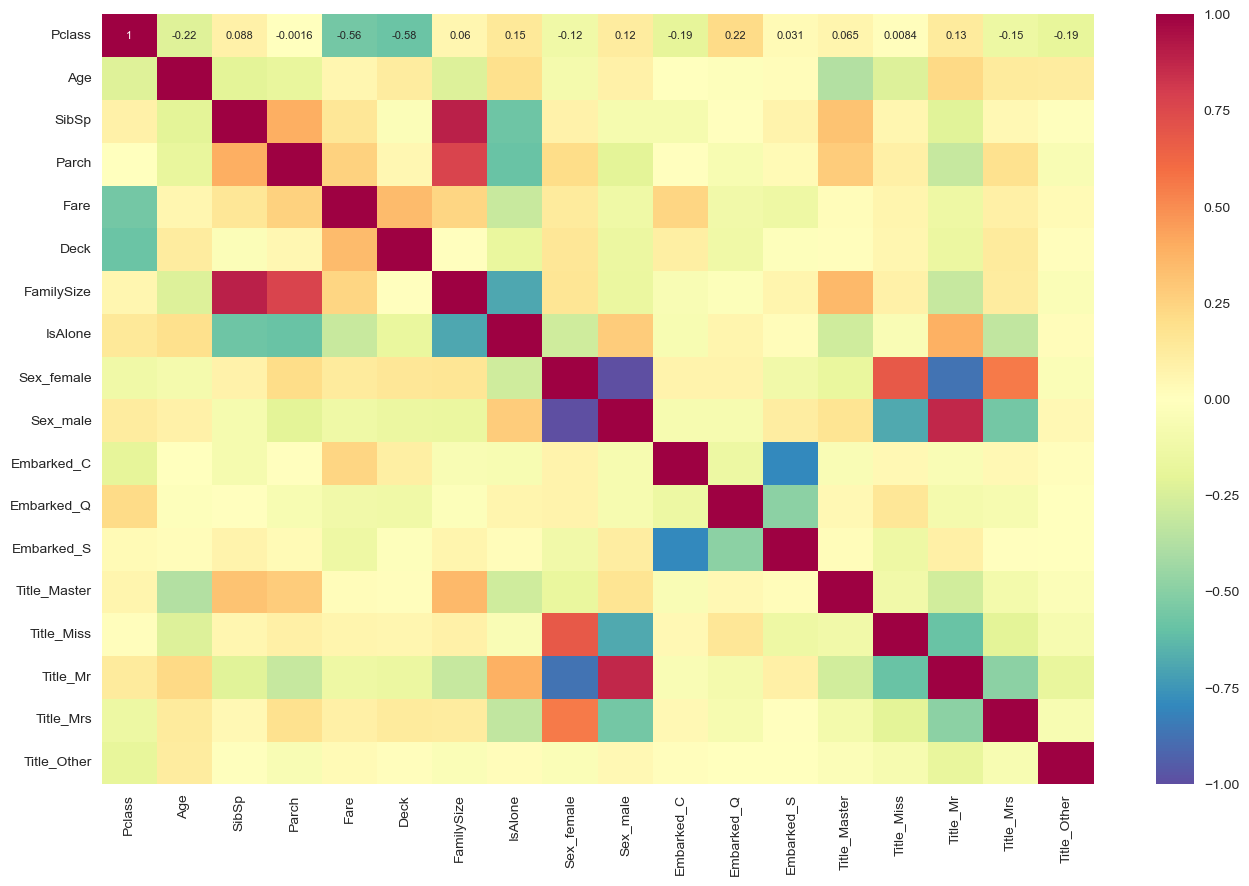

In [39]:
# Calculate the correlation matrix of X_train DataFrame using the .corr() function and 
# save it in a variable called 'corr_matrix'. Then pass the corr_matrix to the sns.heatmap() function for plotting. 
# Optional: you can use f, ax = plt.subplots(figsize=(12, 8))  
# Optional sns.heatmap arguments : annot=True,  annot_kws={'size': 8} and cmap="Spectral_r" 

########## FILL IN YOUR SOLUTION HERE ########## 
corr_matrix =X_train.corr()
fig, ax = plt.subplots(figsize=(16,10))
ax = sns.heatmap(data=corr_matrix, annot=True, 
            annot_kws={'size': 8}, 
            cmap="Spectral_r")
plt.show()


We see that there is significant correlation between multiple pairs of features; 
For example, the values of 'FamilySize' and 'IsAlone' are perfectly negatively correlated - having a family size larger than one means that you are not alone 
Also, the 'Pclass' and 'Deck' are negatively correlated because the higher the ticket class, the upper on the ship's deck corresponding cabins tended to be - it is not a perfectly positive correlation (i.e. it is <1) because it could happen that a deck's cabins could be split among various ticket classes.

High correlation among features results in high dimensionality in the features set. This leads in the existence of a lot of noise, which hinders the process of uncovering the signal, or the information necessary in modelling the associations between different feature values and class labels. 

### Check the distributions

#### What are the ranges of the various features? 

In [40]:
# Apply the .describe() function on the X_train
X_train.describe()


,Pclass,Age,SibSp,Parch,Fare,Deck,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
count,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.0,623.00,623.00,623.00
mean,2.31,29.00,0.54,0.39,31.72,0.84,1.93,0.59,0.35,0.65,0.19,0.08,0.73,0.05,0.2,0.58,0.15,0.02
std,0.84,14.26,1.13,0.80,46.92,1.64,1.62,0.49,0.48,0.48,0.39,0.27,0.44,0.22,0.4,0.49,0.35,0.15
min,1.00,0.42,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
25%,2.00,20.00,0.00,0.00,7.92,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
50%,3.00,28.50,0.00,0.00,14.46,0.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.0,1.00,0.00,0.00
75%,3.00,37.50,1.00,0.00,31.27,0.00,2.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.0,1.00,0.00,0.00
max,3.00,74.00,8.00,6.00,512.33,7.00,11.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00


We see that there are significantly different ranges among the training set's features => we need to apply features scaling to make sure that each feature is considered by the models we train as contributing equally to the dependent variable's values. Otherwise, it would consider those with higher ranges are contributing more, distorting our results. 

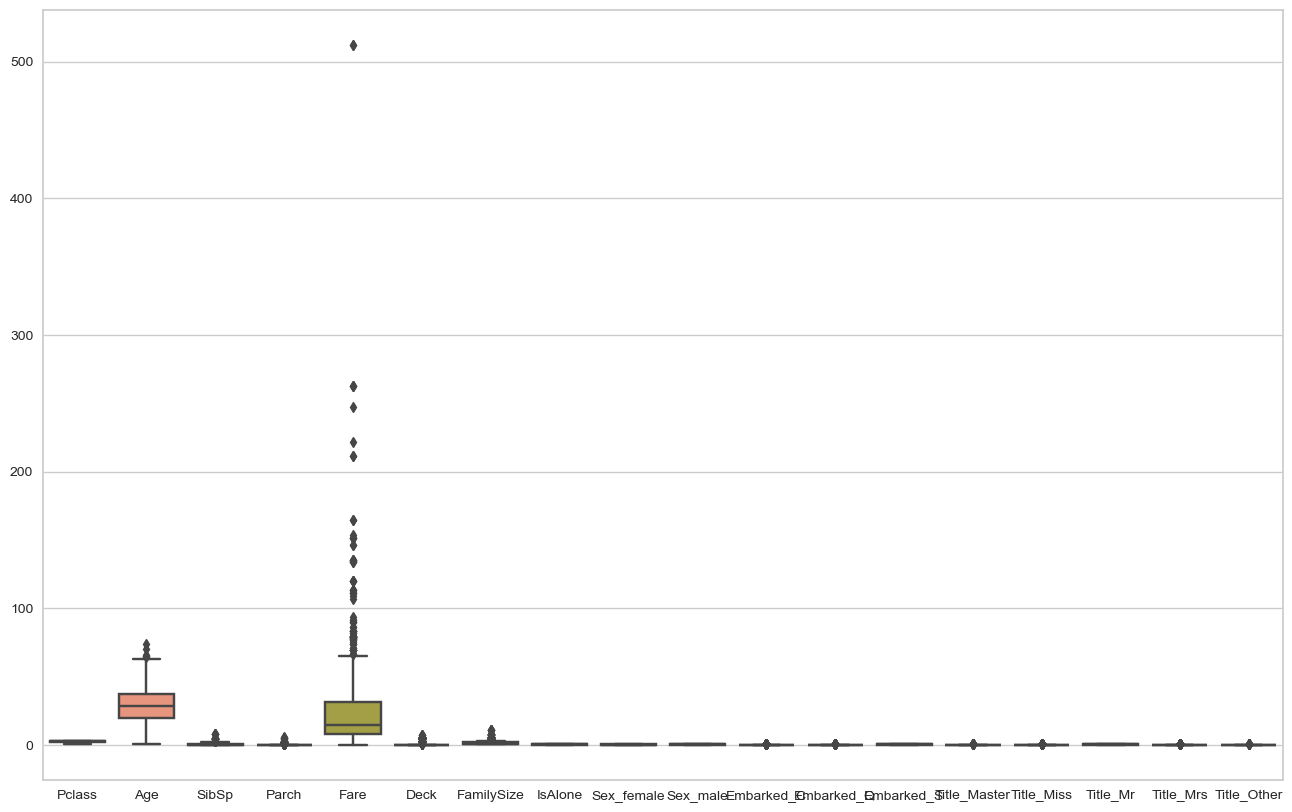

In [41]:
# Visualise the X_train data in a seaborn boxplot. Optional: set the plt.figure(figsize=(15,10))

fig, ax = plt.subplots(figsize=(16,10))
ax = sns.boxplot(data=X_train)
plt.show()

We also have multiple outliers, but we will not cater for them right now.

### Scaling

I will utilize sklearn's StandardScaler class. This is even though there are outliers and our numerical variables do not seem to be normally distributed, but it is the widely accepted practice to use this scaler for KNN, SVMs and PCA. 

In [42]:
# 1. Instantiate the StandardScaler() or MinMaxScaler(). Store into a variable named "scaler" 

# 2. Fit the scaler ONLY on the X_train data - Use the scaler.fit_transform() on the X_train set 
# You will also need to convert the results of scaler.fit_transform() back to a pandas DataFrame by calling pd.DataFrame() with
# columns=X_train.columns. Assign the result back to the variable X_train. 

# 3. Transform (do not fit!) the test dataset using the (fitted) scaler. Use the scaler.transform() on the X_test. 
# You will also need to convert the results of scaler.fit_transform() back to a pandas DataFrame by calling pd.DataFrame() with
# columns=X_test.columns. Assign the result back to the variable X_test.  

# 4. Transform (do not fit!) the test dataset using the (fitted) scaler. Use the scaler.transform() on the unknownData. 
# You will also need to convert the results of scaler.fit_transform() back to a pandas DataFrame by calling pd.DataFrame() with
# columns=unknownData.columns. Assign the result back to the variable unknownData. 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
unknownData = pd.DataFrame(scaler.transform(unknownData), columns=unknownData.columns, index=unknownData.index)


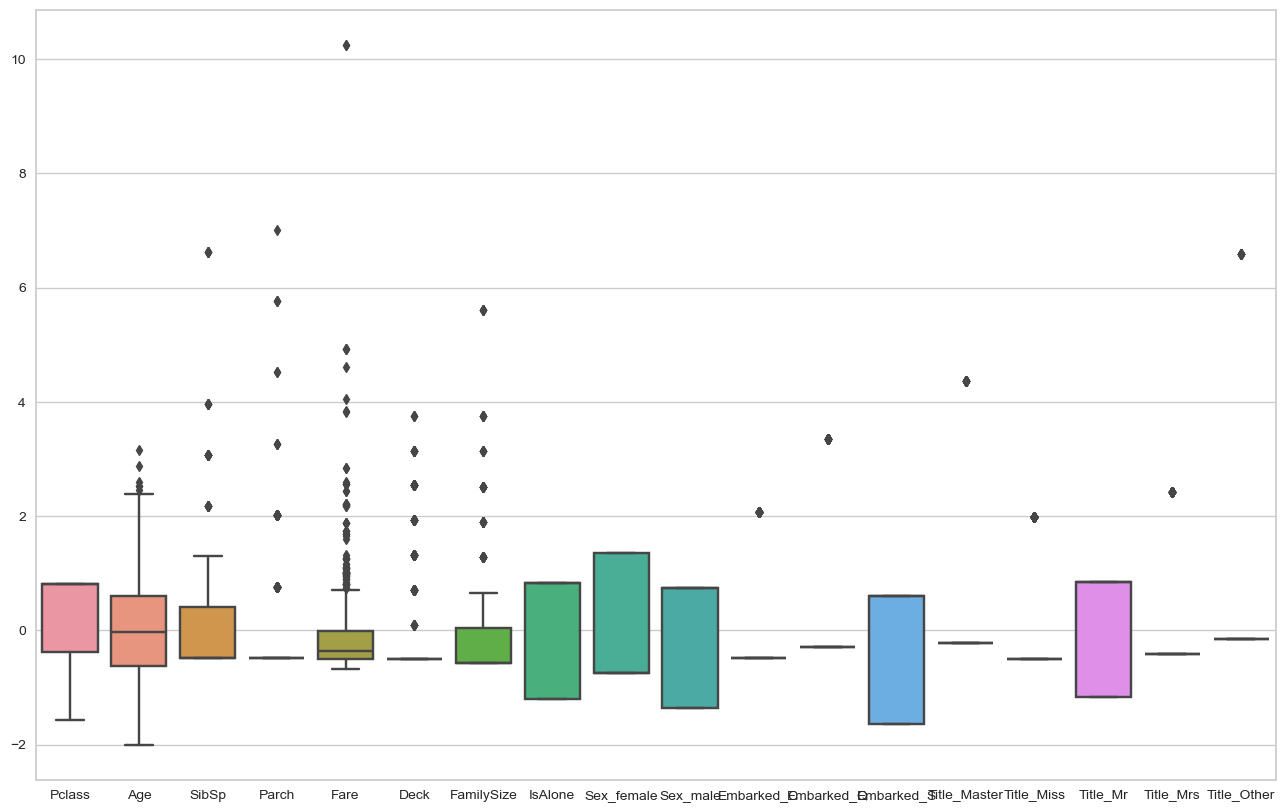

In [43]:
# Run once more the boxplot on the scaled X_train data
fig, ax = plt.subplots(figsize=(16,10))
ax = sns.boxplot(data=X_train)
plt.show()

This is not needed in Decision Tree and Random Forsest classification, because they do not work with distances or gradient descend. It is necessary, however, for KNN and SVM model fitting (+ logreg?). 

The reason we perform feature scaling is the fact that variables with bigger scales would have an excessive impact on / contribute more to the learning proecdess, so that we would get skewed/biased outcomes. 

Also, by applying feature scaling we also achoeve improvements in algorithm performance through the hastening of convergence to the ideal outcomes. Furthermore, numerical instabilities are prevented, by mitigating the numerical over/underflow problems that could arise due to significant scale disparities. 

***

We perform dimensionality reduction because highly dimensional data (aka data including high correlation between features, repetitive, redundant of irrelevant informatioon) distorts the notions of distance and similarity, making uncovering the associations between features & classes much more -computationally- difficult. So we imple,ent techniques that reduce the noise & correlation, while still capturing most of the signal, i.e. the info useful for captiring the asscociations in our datraining set so that it generalizes well. The features we typically disregard are those explaining the least amount of variance in the given dataset; these are the mostly responsible for the noise in our data, bearing redundant & repetitive info also conveyed by other features (at least in part) => by ignoring them and accepting a slight drop (from 100%) in our pool of features' capability to explain the variance included in our initial data,m we can extract the signal more easily. 


### Kmeans clustering on the results of PCA 

**[definition and value for ML model fitting]** PCA is a linear dimensionality reduction technique that performs an orthogonal linear transformation to our possibly correlated features into uncorrelated ones. It casts the initial features into a new coordinate system, as the systems axis unit vectors. This way, it ensures zero correlation between them. As a result, we can then select a subs==set of those linearly transformed vectors, which manage to explain an adequate percentage (%) of variance in our initial data, so as to make extracting the signal & hidden dynamic -computationally- easier. 

It works based on distances between data samples, so scaling is necessary to prevent biased results (always happen prior to this). 

The obtaining of principal components happens as follows: we perform the eigen-decomposition of the covariance matrix (suppose dimensions NxN) of the SCALED features set, This gives us a set of N eigenvectors which are -by definition- orthogonal to each other and also unit vectors, and thus determine the directions (axes) of the new features space we cast our samples into. Each of those axes is linked to a specific value (eigenvalue), which represents the magnitude of each of those directions, aka the (%) variance that component manages to explain in the given features space, or the proportion of the :signal": that this feature assists in capturing. Eg.g. the "first axis/PC1 accounts for ...% of the variance in our features set".

It falls under the family of algorithms of "unsupervised learning", so it only deals with unlabeled data (aka the features set), NOT taking into consideration the class variable's column ('y') in ANY case. 

**[value for visualizations]** By using just the 2 first principal components, we can create a scatterplot with a 'class' hue that (possibly) incorporates a good percentage of the information on the relationships between our features and class labels (aka the signal). This can help us get a better picture of the nature of the associations i our data (linear, etc) and thus determine the right nature of models to use (eg linear because it seems to be linearly separable dataset vs polynomial/rbf svm because it is clearly not).
[+ it can similarly direct us towards selecting clustering algos - if we see that the clusters that seem to stem out of our data aree far from spherical, or that they could have different sizes and/or densities, then K-Means clustering could be a bad choice, aka produce final clusters of little practical use]


#### PCA 

In scikit-learn, PCA is implemented as a transformer object that learns `n` components in its `fit()` method, and can be used on new data to project it on these components. More information on how to use the `pca()` function and its parameters can be found at http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [51]:
# 1) Instantiate the PCA() object by passing as argument the value 0.90 (the cut-off variance value we would like to reach) 
# and store in a new variable "pca"
# 2) Apply pca.fit_transform() on the X_train data and store into a new variable named "pc_scores"
# 3) Print the PCA cummulative variance 
pca = PCA(0.90)
pc_scores = pca.fit_transform(X_train)


In [52]:
# Create a feature name for each Principal Component (such as PC1, PC2, ...) up to the detected number of current dimensions

PCs = ['PC'+str(i+1) for i in range(pc_scores.shape[1])]

The pc scores represent the position of each data sample as casted in this new coordinate system of principal components.

In [53]:
# Convert the pc_scores to a pandas DataFrame using pd.DataFrame() and pass as the columns argument the PCs list that was created in the prevous step
# Assign back to pc_scores. Preview the first entries of pc_scores 
pc_scores = pd.DataFrame(pc_scores, columns=PCs)


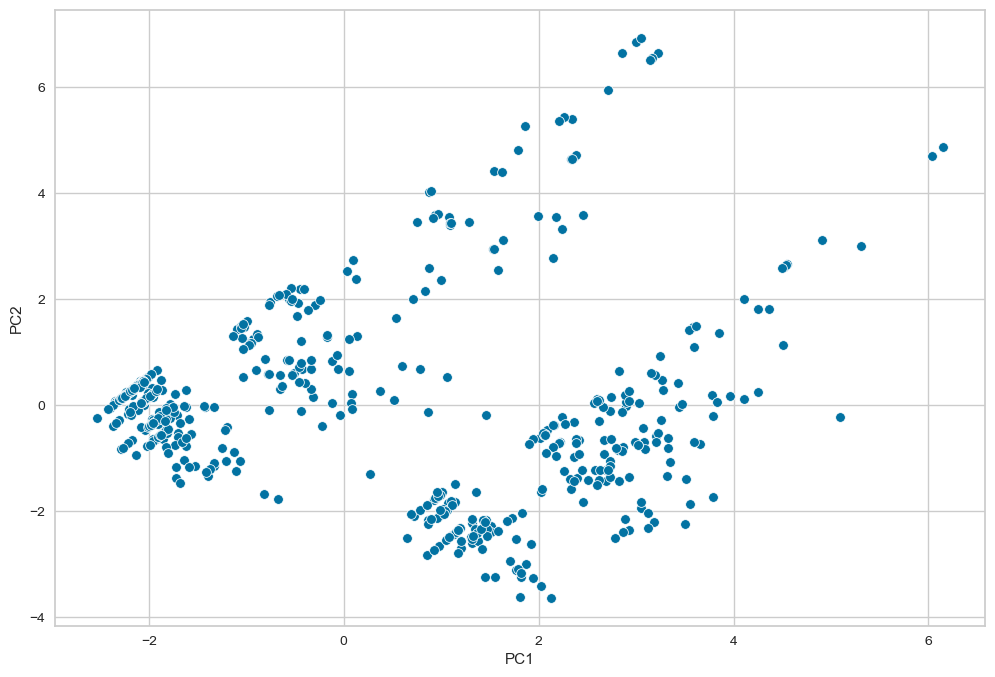

In [54]:
# Plot the first 2 Principal Components ("PC1" vs. "PC2") in a seaborn scatterplot 
# Optional/extra: Should you wish, you can join the y_train class label in the pc_scores and use it as hue in the scatterplot 

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.scatterplot(data=pc_scores, x='PC1', y='PC2')
plt.show()

In [55]:
# Showing the explained and cumulative explained variance from each principal component 
exp_var = [i * 100 for i in pca.explained_variance_ratio_]
cum_var = np.cumsum(pca.explained_variance_ratio_ * 100)
pca_var = pd.DataFrame({'exp_var': exp_var, 'cum_var': cum_var})
# maybe also set the index the same as pc_scores.columns ???
pca_var.head()

,exp_var,cum_var
0,24.55,24.55
1,15.73,40.29
2,12.45,52.73
3,10.23,62.96
4,7.03,69.99


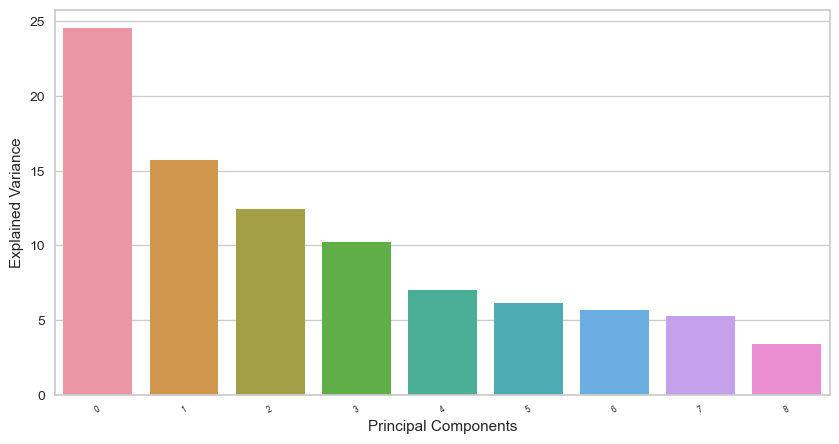

In [56]:
# Plot the explained variance per PC using a barplot

fig = plt.figure(figsize=(10,5))
ax = sns.barplot(x=pca_var.index, y='exp_var', data=pca_var)
ax.set(xlabel='Principal Components', ylabel='Explained Variance')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, fontsize=6)
plt.show()

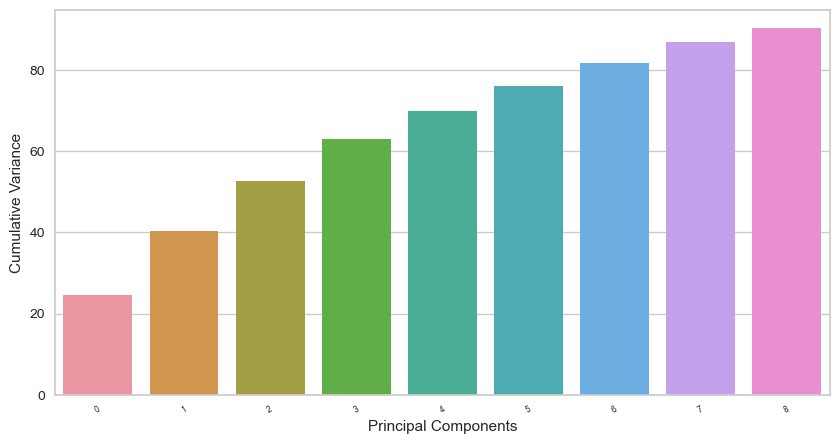

In [57]:
# Plot the cumulative variance per PC using a barplot

fig = plt.figure(figsize=(10,5))
ax = sns.barplot(x=pca_var.index, y='cum_var', data=pca_var)
ax.set(xlabel='Principal Components', ylabel='Cumulative Variance')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, fontsize=6)
plt.show()

In [58]:
# Plot the data points of the given dataset under the scope of the two first principal components ~ use case of PCA on EDA
X_train_scores_enhanced = pc_scores.join(titanicData['Survived'])  # and not .join(y), so as to get only the correct number of 
# corresponding observations (works through index matching)
X_train_scores_enhanced.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Survived
0,3.27,0.47,0.07,-1.65,2.14,0.05,-0.21,0.04,0.86,NaN
1,-2.34,0.08,-0.36,-0.81,0.56,0.07,0.44,0.20,-0.10,0.0
2,-1.93,-0.63,0.10,2.24,1.01,-0.70,-0.43,0.95,-0.40,1.0
3,-2.09,0.42,-0.76,-0.47,-0.11,-0.44,-0.26,0.16,0.19,1.0
4,0.94,3.59,-1.02,0.49,-1.20,0.07,-3.06,-1.14,0.44,1.0


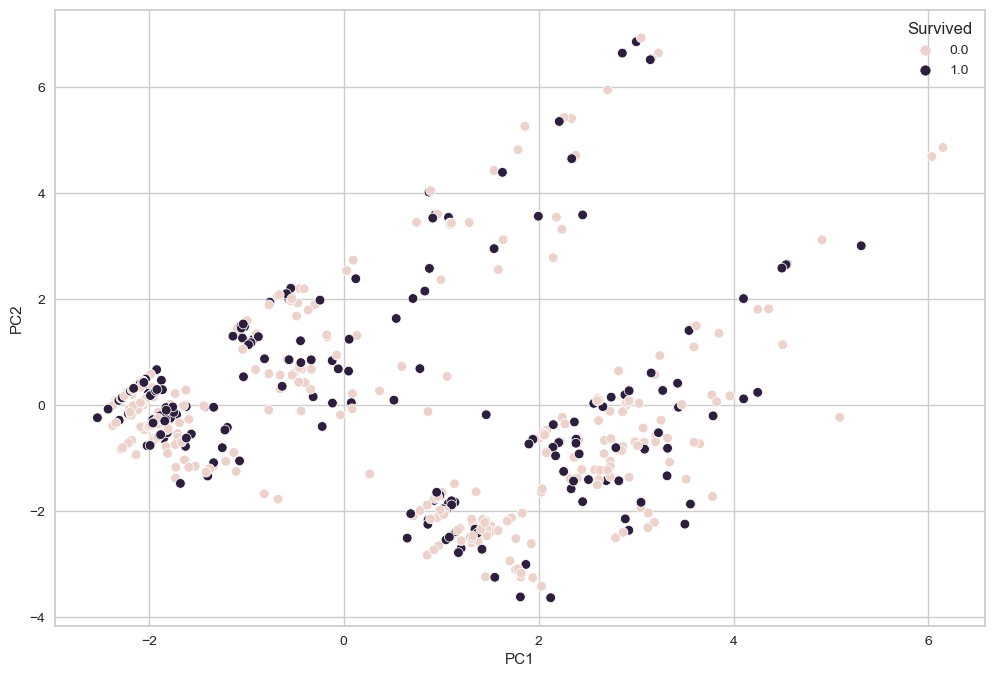

In [60]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.scatterplot(data=X_train_scores_enhanced, x='PC1', y='PC2', hue='Survived')
plt.show()

Not a great distinction is made - the first two principal components do not explain the vast majority of variance in the given data.

We also see that the data are clearly not linearly separable - we do not expect that linear SVMs will perform well.

Additionally, it seemslike there are areas of varying densities, and the clusters that could be formed may not be spherical. So a K-Means model is not expected to perform well enough and produce clusters of 

#### 2. K-means

#### Elbow method 

Elbow Method : There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. The elbowpoint is the point where the rate of decrease of mean distance i.e. SSE will not change significantly with increase in number of clusters.

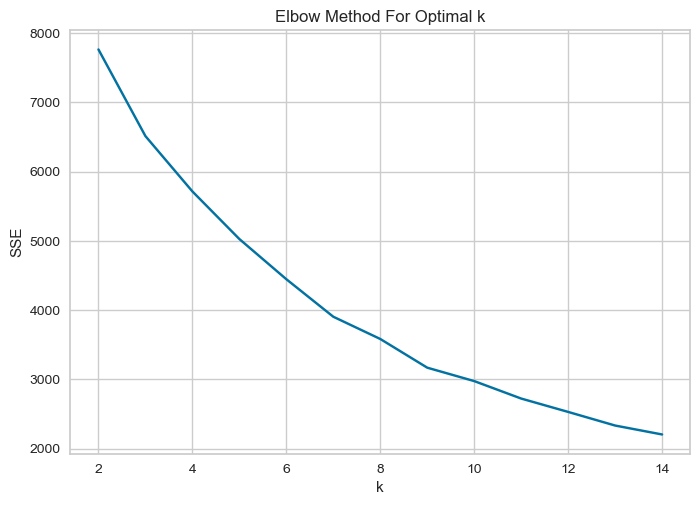

In [61]:
# Can you run the elbow rule to find the optimal number of K for kmeans that we need to use on our pc_scores?? 
# Create an empty list for sum of squared distances to be appended for k values 2 to 15
Sum_of_squared_distances = [] 

# Values for K (centroids) 
K = range(2, 15)

for k in K:
    km = KMeans(n_clusters =k)
    km = km.fit(pc_scores)
    # sum of squared errors in the final clusters    
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

The elbow curve is pretty smooth - the optimal k is given at the point where there begin the diminising returns in SSE reduction from adding an extra cluster. That seems to be at around 6 clusters. 

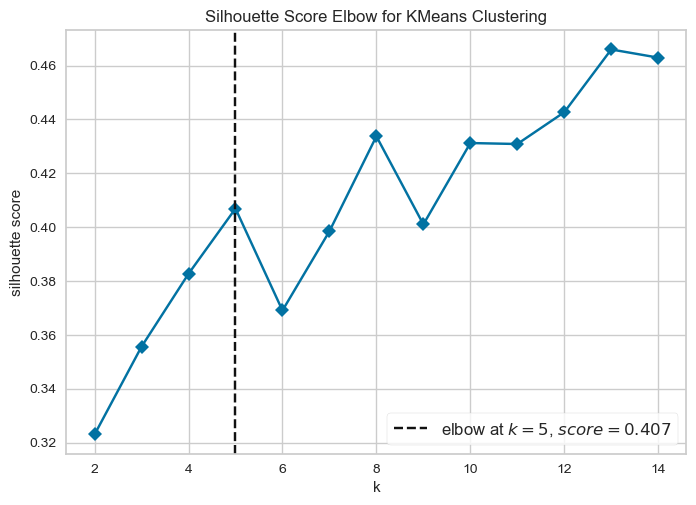

In [62]:
# I will also plot the silhouette coefficient for the same range of K values to see what first best.
model = KMeans(random_state=123) 

visualizer = KElbowVisualizer(model, k=(2, 15), metric='silhouette', timings=False)  # timings would return to as the amount of time to 
# train the clustering model per K as a dashed green line
visualizer.fit(pc_scores)    
visualizer.poof()
plt.show()

I have conflicting results - I will go with k = 5 as it is suggested to go with lower k when troubled. 

In [63]:
kmodel = KMeans(n_clusters=5)
kmodel.fit(pc_scores)
cluster_assignments = kmodel.labels_
pc_scores['KMCluster'] = cluster_assignments
pc_scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,KMCluster
0,3.27,0.47,0.07,-1.65,2.14,0.05,-0.21,0.04,0.86,2
1,-2.34,0.08,-0.36,-0.81,0.56,0.07,0.44,0.20,-0.10,1
2,-1.93,-0.63,0.10,2.24,1.01,-0.70,-0.43,0.95,-0.40,1
3,-2.09,0.42,-0.76,-0.47,-0.11,-0.44,-0.26,0.16,0.19,1
4,0.94,3.59,-1.02,0.49,-1.20,0.07,-3.06,-1.14,0.44,3


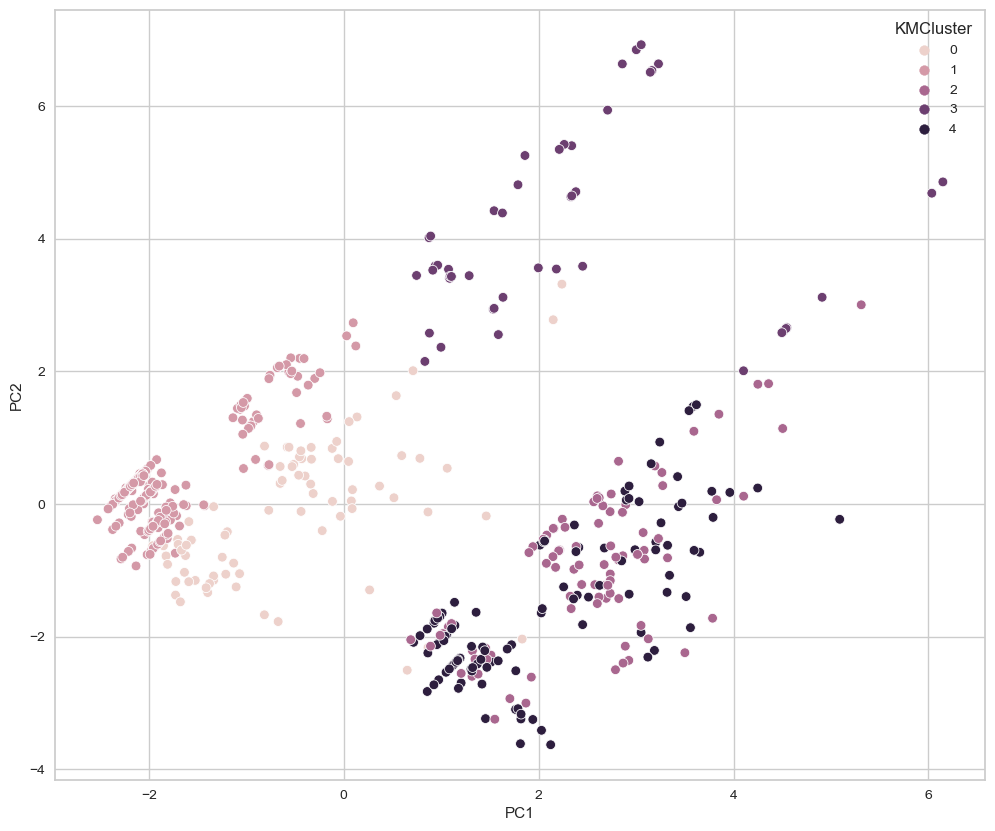

In [64]:
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.scatterplot(data=pc_scores, x='PC1', y='PC2', hue='KMCluster')
plt.show()

In [ ]:
# 1) Instantiate a KMeans object with n_clusters equal to the **OPTIMAL k** as found above and store it in a variable named "kmodel" 
# 2) .fit() the kmodel model on the pc_scores(!!) data 
# 3) Use the .labels_ parameter on kmodel to get the assinged clusters and save the results in a new variable "cluster_assignment".
# 4) Save the output of cluster_assignment to pc_scores["KMCluster"]  
# 5) Preview the first few rows of pc_scores
kmodel = KMeans(n_clusters=5)  # need to re-run
kmodel.fit(pc_scores)
cluster_assignment = kmodel.labels_
pc_scores['KMCluster'] = cluster_assignment
pc_scores.head()

In [ ]:
# Plot the 2 Principal Components (PC scores) in a scatterplot using the "KMCluster" as hue
# Enhanced scatterplot 
sns.scatterplot(data=pc_scores, x='PC1', y='PC2', hue='KMCluster')
plt.show()


In [ ]:
# Due to the fact that the first two components explain even less than 50% of the variance existent in the given data, this 2D representation 
# does now show well separated clusters. 

## Model, predict and solve

### Classifiers - Predict using the *subset* test set (not the unknown yet) 

In [ ]:
# Create an empty DataFrame to store and compare all evaluation results (performance metrics) across all classifiers 

clf_results = pd.DataFrame([])

## Support Vector Machines 
kernel -> linear -> that will dictate the geometric form of the boundary when it gets projected into the initial features space (<> not necessarily in the higher-dimensionaln space that features are initially cats upon in order to find a perfect split between the classes)


Since the SVM optimization goal is based on geometric distances, axis with very different scaling makes the model favor the direction with the largest values => very important to scale your data beforehand!!! Otherwise, it will consider the features of higher range as being of higher significance, meaning that they will be perceived by the algorithm in contributing more to distinct between the various classes. 

**difference of SVMs to KNN and DT/RF classifiers:** SVMs only use the support vectors to solve for their objective/loss/cost function, and NOT all the samples in the input data !!! Deleting the support vectors will change the position of the hyperplane ~ the boundary would get redesigned completely; SVs are KEY <> if we removed any other point, NOTHING would change

+ **difference specifically with DT/RF classifiers:** the boundaries drawn by DT/RF classifiers (in the original dimensions of the training data, since they do not cast them to higher dimensional spaces) are strictly linear and they create box-like boundaries (i.e. they are parallel to the axes) <> this is not necessarily true for SMVs, it depends on the type of kernel we choose

+ **diff with KNN;** the KNN classifier is an instance-based learner, it doesn't actively create boundaries but instead it classifies new/unknown samples based on their distance from all the training data whose characteristics/feature values it keeps stored in memory

<strong><u>Objective function:</u></strong> maximize the margin between the hyperplane that distinguishes the two classes and the support vectors (i.e. the closest data points from each class).
Why? The larger the margin, the higher the generalization ability of the model. 

Even if the data are linearly separable so we can use the linear kernel to perform classifications with little training error, we might prefer to conduct not hard-margin classification but soft-margin classification, in order to favor our model’s generalization performance by reducing variance, aka the probability of overfitting to the given dataset’s very specific characteristics.
This slightly modifies the objective function: we add a factor of penalty for margin violations so as to maximize margin while also minimizing the total amount of slacks. 

Techniques implemented to avoid overfitting in SVM models are called to perform <strong><u>“regularization”</u></strong>. As C increases => cost/penalty increases => the model becomes more strict in allowing points to run free on either side of the spectrum (the "street") => margin decreases => the probability of overfitting increases. In the extreme case (i.e. for "infinitely" high values of C) we revert to the case of hard-margin classification. Smaller C (and, similarly, higher gamma) will produce boundaries with more support vectors. By increasing the number of support vectors, SVM reduces its variance, since it depends less on any individual observation (which is very dataset-specific). Reducing variance makes the model more generalized.

<strong><u>In linearly inseparable data (which we can observe through PCA visualizations) -> what can we do?</u></strong>
An idea is to project the training samples to a higher dimensional space in which separation is possible. 
A very surprising aspect of SVMs is that in all of the mathematical machinery it uses, the exact projection, or even the number of dimensions, doesn’t show up. You could write all of it in terms of the dot products between various data points (represented as vectors - the higher the dot product, the more similar the two samples).
If we have n points in our dataset, the SVM needs only the dot product of each pair of points to find a classifier. Just that. This is also true when we want to project data to higher dimensions. We don’t need to provide the SVM with exact projections; we need to give it the dot product between all pairs of points in the projected space.
A kernel, short for kernel function, takes as input two points in the original space, and directly gives us the dot product in the projected space. <> If we were to first perform the projection and then compute the dot products of all pairs of values in our training set, that would need a multitude of extra operations compared to just feeding all possible pairs of data points into the kernel function (~ much more computationally efficient) => kernels give us the exact same result (w/o any inaccuracies) + they have parameters we can tweak so as to help the model get a better grasp of our training set. 

 So, in linearly inseparable cases, we make use of <strong><u>kernel functions - how do they work?</u></strong>
(in the simplest case - 2D feature space)
- Start from a non-separable 2D space - NO linear model could accurately separate the 2 classes in such a case. 
- Perform the inverse of pca (dimensionality reduction technique): fit the data into a kernel function that does a pre-processing & transforms/projects them to a higher dimensional space, in which (linear, polynomial, sigmoid, Gaussian or whatever) separation is effectively possible. 
<strong>!!! BUT !!! the number of dimensions shouldn't be too high => this would result in very complex boundaries => sharpened risk of overfitting.</strong>
- Then, we back-project the data & the boundary to the initial input space. This may give us ANY shape or form around our training data; the risk of overfitting is very high in this approach. Some complexity is inevitable to be involved. However, this doesn't necessarily lead to overfitting. 

Kernels typically considered: Lineary, polynomial, rbf (widely used when we have little clue of the data under study), sigmoid -> the higher the additional hyperparams (other than C), the longer it takes is to optimize, and we may end up with curves that are too complex resulting in overfitting on our data

<strong><u>gamma hyperparameter/factor:</u></strong> the higher the gamma, the lower the distance of influence of a single support vector, so the more the boundary will end up surrounding it and the higher its complexity/variance.
High gamma: the model will tend to create curves that only surround the SVs - no regularization with C can improve the situation
Low gamma: distant points will also influence the support vectors, in so that the boundary’s form would depend only on the existence of areas of high density in the data and would just try to separate those, missing the dataset’s complexity or “shape” - no regularization with C can improve the situation
<strong><u>So we typically opt for medium values of gamma, and perform regularization by tweaking C - higer values make smooth models more complex.</u></strong>

<strong>“Regularization parameters dictate the trade-off between bias and variance, aka between having a wide margin and correctly classifying the training data (error toleration).”<strong>

So by reducing C or increasing gamma we can “regularize” our model if we think it is over-fitting 
<=> 
go for smoother boundaries with higher margins, through allowing for more misclassifications on the training set (margin violations), producing a more flexible model that will generalize better


<strong>Advantages:</strong> very flexible (allows for different kernels to be used), can perform well even in high dimensional spaces, and also in cases where # dimensions/features > # samples + memory efficient as it only uses the support vectors to construct the decision function 
<strong>Disadvantages:</strong> black box model, we need to perform memory expensive methods to extract its decision criteria + choosing the right kernel might be tricky 

#### 1a. Support Vector Machine (RBF) - benchmark model (default parameters)

In [ ]:
# Step 1 - Instantiate the SVC() classifier using the default parameters (Default hyperparameters are C=1.0, kernel=rbf and gamma=auto) 
# Assign the result into a new variable named "rbf_svm" 
# Step 2 - Fit the rbf_svm model to the training set (X_train, y_train)
# Step 3 - Predict the test data (X_test) using the rbf_svm model and assign to "y_pred_rbf_svm" 
# Step 4 - Print the final overall accuracy and classification_report for the test set (X_test) 

rbf_svm = SVC()
rbf_svm.fit(X_train.values, y_train.values.ravel())
y_pred_rbf_svm = rbf_svm.predict(X_test.values)
print('Overall Accuracy:', metrics.accuracy_score(y_test, y_pred_rbf_svm))
print('Classification report:\n', metrics.classification_report(y_test, y_pred_rbf_svm))

We see that it managed to capture 71% of all minority class samples, and 85% of the "Didn't Survive" predictions it gave were Correct. All in all, it managed to catch 81% (macro recall) of actual values from each class on average, and 84% (on average) of the predictions it gave equal to each class label were correct (macro precision). 

The weighted average of these two gives 0.82 f1-score (macro). 

We consider macro f1-scores to make performance comparisons between different models. This is because here we have significant class imbalances, so weighted metrics, given that the model performs well on the majority class, obscure the reality of the overall accuracy of the model through the higher weights they assign to the scores on the majority class. 

We prefer it over other metrics like "accuracy", because f1-score takes into account both precision and recall, so it is sensitive to both type 1 and type 2 errors (false positive -i.e. wrong classification that a sample belongs to the 'didn't survive' class and false negative -i.e. falsely claiming that a sample belongs to the 'Survived' class, respectively), so it gives a more balanced view of the model's generalization performance.



<strong><u>! In cases where it is ver crucial to correctly classify unseen/new samples of the minority class, it could be even better if we only considered the f1 score for the minority class to find the odel with the highest and most balanced result in terms of exactness (precision) and completeness (Recall). </u></strong>

In [ ]:
# Add the results of the benchmark SVM classifier as a new row into clf_results that collects all the results across all models

clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Benchmark RBF SVM', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_rbf_svm), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_rbf_svm), 3)})])

clf_results

#### 1b. Linear SVM - benchmark model (default parameters)

In [ ]:
# 1. Instantiate the SVC classifier with a linear kernel. Assign the result into a new variable named "linear_svm" 
# Step 2 - Fit the linear_svm model to the training set (X_train, y_train)
# Step 3 - Predict the test data (X_test) using the linear_svm model and assign to "y_pred_linear_svm"
# Step 4 - Print the final overall accuracy and classification_report for the test set (X_test) 

linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train.values, y_train.values.ravel())
y_pred_linear_svm = linear_svm.predict(X_test.values)

print('Overall Accuracy:', metrics.accuracy_score(y_test, y_pred_linear_svm))
print('Classification report:\n', metrics.classification_report(y_test, y_pred_linear_svm))

Because the hyperplane the linear kernel constructs between classes is simpler, it did a poorer job both in capturing the actual samples of each class (recall on each class as well as macro) and in giving accurate predictions for each class (precision on each class as well as macro). This also gave it a lower f1 score.

In [ ]:
# Add the results of the benchmark SVM classifier as a new row into clf_results that collects all the results across all models

clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Benchmark Linear SVM', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_linear_svm), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_linear_svm), 3)})])

clf_results

#### 1c. Optimal SVM - SVM hyperparameter tuning

Proper choice of C and gamma is critical to the SVM’s performance. **One is advised to use GridSearchCV with `C` and `gamma` spaced exponentially far apart to choose good values.** Detailed information on the SVM hyperparameters can be found at https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py 

As a first step, create a dictionary of hyperparameter ranges and conduct a grid or random search with cross-validation:

In [ ]:
# Finding the optimal SVM classifier - I make sure that, in my parameter values grid, C and gamma values are spaced exponentially 
# between them, as this is the recommended practice
C_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
gamma_range = [1, 0.1, 0.01, 0.001, 0.0001,'auto','scale']
param_grid = [ {'C':C_range, 'kernel':['linear'], 'class_weight': [None, 'balanced']},  # even though we're also doing stratified cross 
              # validation, we take an extra step to address class imbalances by validating for the various options of class weigtings as well
               {'C':C_range, 'kernel':['rbf'], 'gamma':gamma_range, 'class_weight': [None, 'balanced']},
               {'C':C_range, 'kernel':['poly'],'degree': [2,3,4] ,'gamma':gamma_range, 'class_weight': [None, 'balanced']} 
             ]  # here I am asked to check what happens on different value sets for various hyperparameters

svm_grid_cv = GridSearchCV(estimator=SVC(random_state=0),
                        param_grid=param_grid,
                        n_jobs=-1,
                        cv=10  # and not 10-fold, for speed reasons - because here we do not hold a lot of data samples, we would generally want to do 10-fold to get more data fdor the model to train on on each fold
                        # Also, inserting an integer in the classification case ensures that stratified k-fold cross validation takes place 
                        )

svm_grid_cv.fit(X_train.values, y_train.values.ravel())


<strong><u>Note</u></strong>: under a case of class imbalances like this one, we used the f1 score (on the minority) class to compare the performance of various models. However, when fine tuning a specific model, we assess the various candidate estimators based on the "accuracy" (default metric of sklearn on classification cases) of their predictions on the test set. 

This is because y_test will always have a set number of samples pertaining to each class, so the model with the highest accuracy is expected to catch most if not all samples of the majority class, but it would be expected to also catch a reasonable amount of cases of the minority class.

In [ ]:
print('Best SVM parameters:', svm_grid_cv.best_params_)

In [ ]:
# 1. Build the (optimal) classifier using the optimal parameters detected by the tuning process. Assign to a new variable svm_opt. 
# Note: you can use either svm_grid_cv.best_estimator_ to retrieve the model or the svm_grid_cv.best_params_ from above into a new SVC()
# 2 - Fit the svm_opt model to the training set (X_train)
# 3 - Predict the test data (X_test) using the svm_opt model. Assign to a variable named y_pred_svm_opt
# 4 - Print the final overall accuracy and classification_report for the test set (X_test) 
svm_opt = svm_grid_cv.best_estimator_
svm_opt.fit(X_train.values, y_train.values.ravel())
y_pred_svm_opt = svm_opt.predict(X_test.values)
print('Overall Accuracy:', metrics.accuracy_score(y_test, y_pred_svm_opt))
print('Classification report:\n', metrics.classification_report(y_test, y_pred_svm_opt))


In [ ]:
# Add the results of the optimal SVM classifier as a new row into clf_results that collects all the results across all models

clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Tuned SVM', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_svm_opt), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_svm_opt), 3)})])

clf_results

#### 2a. KNN - benchmark model (default parameters)

- <strong>Added value:</strong> - 
- <strong>Hyperparameters:</strong> distance metric, weighting of distances, n_neighbors considered for classification out of majority voting 
- <strong>Unique characteristics (in comparison to DTs/RFs and SVMs we’ve looked at)</strong>: “lazy” (instance-based) learner, doesn’t actively build a boundary => it doesn’t store a boundary in memory, rather it keeps ALL training samples stored and uses all of them to make computations each time it comes across a new data sample => very expensive (computationally) to get a classification (<> the other models may be expensive to train but they only compare the feature set of new samples to the boundaries they construct, so classification is much easier/faster/resource cheap)
- <strong>Problem/Downside:</strong> it stores all the training set in memory and coprates each new/unseen data sample with all points in the training set each time a prediction is to be made => very computationally expensive to get predictions, although it is not expensive to ‘fit/train’ it. 
- <strong>Objective function: ???</strong> (get the k (pre-set) first samples you get when you order them in descending order based on distance from a new sample)

In [ ]:
# Step 1 - Instantiate the KNeighborsClassifier() classifier using the default parameters  
# Assign the result into a new variable named "knn" 
# Step 2 - Fit the knn model to the training set (X_train, y_train)
# Step 3 - Predict the test data (X_test) using the knn model. Assign to y_pred_knn
# Step 4 - Print the final overall accuracy and classification_report for the test set (X_test) 

knn = KNeighborsClassifier()
knn.fit(X_train.values, y_train.values.ravel())
y_ped_knn = knn.predict(X_test.values)
print('Overall Accuracy:', metrics.accuracy_score(y_test, y_ped_knn))
print('Classification report:\n', metrics.classification_report(y_test, y_ped_knn))


knn = KNeighborsClassifier()
knn.fit(X_train/values, y_train.values.ravel())
y_pred_knn = knn.predict(X_test.values)
print(metrics.classification_score(y_test, y_pred_knn)

param_grid = {}
grid_knn = RandomizedSearchCV(KNeighborsClassifier, n_iter=50, n_jobs=-1, cv=5, param_grid=param_Grid)
grid_knn.fit(X_train/values, y_train/values.ravel())
knn_opt = grid_knn.best_estimator_
knn_opt.fit(X_train.values, yy_train.values.varel())
ypred


In [ ]:
# Use GridSearchCV() with 5-fold or 10-fold cross-validation (cv=5 or cv=10) on KNeighborsClassifier() 
# (more cv folds reduces the chances of overfitting but also increases the run time) on the KNeighborsClassifier classifier 
# 1. Create the dictionary of hyperparameters for KNN
# 2. Set up the GridSearchCV and assign to a new variable named knn_grid_cv
# 3. Fit the grid or random search model to X_train and y_train 
# 4. Report the optimal parameters

params_grid = {'n_neighbors': np.arange(1,101,5), 
               'metric': ['euclidean'], 
               'weights': ['uniform', 'distance']}

gridCV_knn =GridSearchCV(estimator=KNeighborsClassifier(), 
                param_grid = params_grid, 
                cv = 10, # inserting an integer in the classification case ensures that stratified k-fold cross validation takes place 
                n_jobs = -1,
            )
g2ridCV_knn =RandomizedSearchCV(estimator=KNeighborsClassifier(), 
                param_distributions = params_grid, 
                cv = 10, # inserting an integer in the classification case ensures that stratified k-fold cross validation takes place 
                n_jobs = -1,
                n_iter=50
            )


gridCV_knn.fit(X_train.values, y_train.values.ravel())

In [ ]:
print('Best KNN parameters:', gridCV_knn.best_params_)

In [ ]:
# Build the classifier using the optimal parameters detected by the tuning process
# Note: you can use either knn_grid_cv.best_estimator_ to retrieve the optimal model. Assign to knn_opt.  
# 2 - Fit the knn_opt model to the training set (X_train, y_train)
# 3 - Predict the test data (X_test) using the knn_opt model. Assign to a variable named y_pred_knn_opt
# 4 - Print the final overall accuracy and classification_report for the test set (X_test) 
knn_opt = gridCV_knn.best_estimator_
knn_opt.fit(X_train.values, y_train.values.ravel())
y_pred_knn_opt = knn_opt.predict(X_test.values)
print('Overall Accuracy:', metrics.accuracy_score(y_test, y_pred_knn_opt))
print('Classification Report:\n', metrics.classification_report(y_test, y_pred_knn_opt))

In [ ]:
# Add the results of the optimal KNN classifier as a new row into clf_results that collects all the results across all models

clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Tuned KNN',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_knn_opt),3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_knn_opt), 3)})])

clf_results

### DECISION TREES
They are extremely easy to use, requiring little pre-processing of input data; no need to scaling, dealing with missing values, mapping of categorical values to numerical ones (it works well with both numerical and categorical data, no need to input only data in numeric format!!! <> svms and KNN classifiers). 
                +
They offer the <strong>great added benefit</strong> in that they provide insight on the importance of each feature in making predictions/in classifying new data samples. (part of being a white-box model) ~ done through implementing methods working based on how often a feature is used in the model and how much it contributes to the overall predictions (RF: as in how many times each feature is considered by weak/base learners to make classifications)
+ Decision trees (so RFs as well), unlike linear models (like the linear svm), can fit linearly inseparable datasets.

~ the <strong>root node</strong> (topmost node): the most important feature we split upon 

<strong>Problem/Disadvantage:</strong> BUT on taking one Decision Tree on its own, it is VERY unstable as all splits depend on the very specific values that the featurse in the input dataset take, so they show high variance and are very prone to overfitting and thus poor generalization performance (problem tackled through fitting random forests OR ENSEMBLE MODELS in general, which typically use decision trees as their base learners!)

<strong>Characteristic unique to decision trees:</strong> the resulting boundaries [they <strong>do</strong> create boundaries, unline the knn classifiers] are box-like, strictly parallel to the two axes. 

<strong>Objective function:</strong> max information gain <strong>on each split</strong> (recusrive, “greedy” approach) = the reduction in entropy (or gini impurity - this is what sklearn’s CART algorithm does) after the dataset is split on an attribute

<strong>How they work:</strong> ~ each question is constructed by considering each unique value of each feature in the features set. For each value present for categorical variables (like color), it is structured as "is color x/y/z?" <> for each value present for numerical variables (like diameter), it is structured as "is diameter >= value1/value2/value3...?"
Then the information gain is computed in each case, and the node is selected based on what question gives the highest value of information gain. 
The higher the information gain, the better the decision split… because it means that the split concerned results in nodes of higher homogeinity, so it better succeeds in contributing to the creation of perfect boundaries in our predictor space (and uncovering the hidden associations between the features set and the values of the class variable - however, we must be cautious so as to prevent also catching the noise present in the dataset we happened to obtain; that is why we allow for some heterogeneity in leaf nodes!!!) -> this is called ”early extermination” here (through “post/past-pruning”, k-fold validation, or ensemble models) <> svms -> regularization

<strong>Pruning:</strong> limiting the growth of the tree into very long and complex forms 
* Post pruning - eliminating very similar / unnecessary nodes AFTER allowing the tree to grow to its full extent, i.e. until it ends up with pure nodes.
* Pre pruning - limiting the tree’s growth beforehand / in training, through setting specific values for the model’s hyperparameters. 


<strong>Hyperparameters:</strong>
	depth - the larger it is,  the more complex and long trees we can grow => incr. prob. overfitting
	splitting criterion - gini or ‘entropy’(‘entropy’ is called in sklearn but it is the information gain; entropy does not stand as a criterion on its own - CAUTION! Entropy tends to grow fuller trees, whereas gini tends to isolate the most contributing variables/factors) => no effect on prob over/underfitting
	max_features - the max no of features being considered to perform each split. The larger it is, the longer the growing of the tree could go on  => incr prob overfitting (+ makes training the tree very computationally expensive)
	min_samples_split - the higher it is, the more difficult it would be to achieve further splits and grow a long tree => decr prob overfitting, incr prob underfitting 
	min_samples_leaf - if a split results in a node with less samples than min_samples_leaf, it won’t take place => the higher it is, the more difficult it is to perform further splits => decr prob overfitting, incr prob underfitting 

***

### ENSEMBLE MODELS
Ensemble models are primarily <strong>used</strong> to improve the overall accuracy of a model, especially, in cases of over-fitting ('bagging') and under-fitting ('boosting'). We make strategic selections of models under use (based on the characteristics of the data we're working with) so as to combine their strong points and mitigate their shortfalls through the protection that majority voting offers against misclassifications made by single models. 

<strong>How they work:</strong> a large number of independent, diverse machine learning models is fused into one single predictive model. Then, majority voting (or averaging in the case of regression) is implemented to get a more accurate and/or robust prediction / classification. 

### RANDOM FORESTS
Prime example of <strong>bagging:</strong> approach of ensemble modelling used to address cases of overfitting - only in cases of high variance, like in decision trees
+ More accurate and robust than decision trees, the majority prediction from multiple models is better than that of an individual model prediction because the models protect each other from their individual errors.
+ Reduction of variance - less likely to overfit (the majority vote out of multiple diverse estimators captures more aspects of the signal in the data, protecting against considering its noise which leads to poor generalization)
+ Can handle missing values and outliers better than DTs
BUT they are far slower to train and more difficult to interpret than DTs


<strong>How ensemble models work/reduce the variance (susceptibility to overfitting) of base learners through <u>bagging</u>:</strong> Each base learner (DT) trains on a random independent subset taken from the original dataset with bootstrapping. Then, we aggregate the output (majority voting for classification, averaging for regression) of all base learners used to get a more accurate and/or robust prediction/classification. 

<strong>Hyperparameters:</strong> how many estimators / base learners do I want to include in my ensemble??? (offers diminishing returns on performance increase after a given number) + the hyperparams of DTs

<strong>To enhance the independence and diversity of base learners (exclusively DTs) in random forests:</strong>
-> Each base learner (DT) trains on a random independent subset taken from the original dataset with bootstrapping
-> Tweaking the set of features that base learners take into account when performing their splits (maybe not use all features (indep. variables) in bootstrap data sets, but a -different and randomly chosen- subset of them in each)
<u>The two previous steps make use of the fact that DTs are developed based on the very specific characteristics of the data at hand, so minor modifications in the training set can lead to the growing of very different trees.</u>

<strong>Unique characteristic of DTs and Random Forests:</strong> the boundaries they create are always box-like, i.e. parallel to the axes <> svm, can be whatever, according to the type of kernel we decide to use


#### 3a. Random Forest - benchmark model (default parameters)



In [ ]:
# Step 1 - Instantiate the RandomForestClassifier(random_state=0) classifier using the default parameters  
# Assign the result into a new variable named "rf" 
# Step 2 - Fit the rf model to the training set (X_train, y_train)
# Step 3 - Predict the test data (X_test) using the rf model. Assign to y_pred_rf 
# Step 4 - Print the final overall accuracy and classification_report for the test set (X_test) 

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train.values, y_train.values.ravel())
y_pred_rf = rf.predict(X_test.values)
print('Overall Accuracy:', metrics.accuracy_score(y_test, y_pred_rf))
print('Classification Report:\n', metrics.classification_report(y_test, y_pred_rf))

In [ ]:
# Add the results as a new row into clf_results that collects all the results across all models

clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Benchmark RF',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_rf),3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_rf), 3)})])

clf_results

#### 3b. Optimal RF - tune the RF hyperparameters with RandomizedSearchCV( )

In [ ]:
# Use GridSearchCV() with 5-fold or 10-fold cross-validation (cv=5 or cv=10)
# (more cv folds reduces the chances of overfitting but also increases the run time) on the RandomForestClassifier(random_state=0) classifier 
# 1. Create the dictionary of hyperparameters for RF
# 2. Set up the **RandomSearchCV**  and assign to a new variable named cv_rf
# 3. Fit cv_rf to X_train and y_train 
# 4. Report the optimal parameters

param_grid = {'n_estimators': np.arange(10, 200, 10),
              'max_depth': list(np.arange(1, 50, 2)) + [None],  
              'max_features' : ['sqrt', 'log2', None], 
              'min_samples_split': [1, 3, 5, 10], 
              'min_samples_leaf': [1, 3, 10],
              'criterion': ['gini','entropy']
             }  # to fine-tune the model, i am asked to inspect the effect that the size of the tree has on f1, precision, recall -> 
# that will be the only parameter I try multiple values for. I add here the 'criterion' with just one value, so as to return that 
# column in cv_results_ and be able to use it for pivoting and plotting.

# I will perform 5-fold cross-validation (and not 10-fold for speed reasons)
gridCV_rf = GridSearchCV(estimator = RandomForestClassifier(random_state=0), 
                          param_grid = param_grid,
                          cv=10,
                          n_jobs=-1
)  

gridCV_rf.fit(X_train.values, y_train.values.ravel())

In [ ]:
print('Best RF parameters:', gridCV_rf.best_params_)

In [ ]:
# Build the classifier using the optimal parameters detected by the tuning process.
# Note: you can use either cv_rf.best_estimator_ to retrieve the optimal model. Assign to rf_opt.  
# 2 - Fit the rf_opt model to the training set (X_train, y_train)
# 3 - Predict the test data (X_test) using the rf_opt model. Assign to a variable named y_pred_rf_opt
# 4 - Print the final overall accuracy and classification_report for the test set (X_test) 

rf_opt = gridCV_rf.best_estimator_
rf_opt.fit(X_train.values, y_train.values.ravel())
y_pred_rf_opt = rf_opt.predict(X_test.values)
print('Overall Accuracy:', metrics.accuracy_score(y_test, y_pred_rf_opt))
print('Classification Report:\n', metrics.classification_report(y_test, y_pred_rf_opt))

In [ ]:
# Add the results of the optimal KNN classifier as a new row into clf_results that collects all the results across all models

clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Tuned Random Forest',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_rf_opt),3),  
                                                         'F1': round(metrics.f1_score(y_test, y_pred_rf_opt), 3)})])

clf_results

In [ ]:
# Get the feature importance from the rf classifier using rf_opt.feature_importances_
# Cast it into a pd.DataFrame and use sort_values to sort by the importance 
# Plot the rf_opt.feature_importances_ in a barplot
feature_scores = pd.DataFrame(rf_opt.feature_importances_, index=X_train.columns, columns=['Importance'])
feature_scores.sort_values(by='Importance', ascending=False, inplace=True) 
feature_scores.head(10)

Being titled as 'Mr' played the most determining role (compared to other features) in whether a passenger finally survived or not. In this case, let's see what happened with those titled 'Mr' in our data: 

In [ ]:
demo = X_train.join(y_train)
pd.pivot_table(demo, index='Title_Mr', values='Survived', aggfunc='mean')

Only 16% of those titled 'Mr' survived (corresponds to value = 1, which is 0.85 after scaling) - that is probably because they probably got less help from others, in contrast to children and old people or women.

#### 4. Decision Tree - benchmark model (default parameters)

In [ ]:
# Step 1 - Instantiate the DecisionTreeClassifier() classifier using the default parameters  
# Assign the result into a new variable named "dt" 
# Step 2 - Fit the dt model to the training set (X_train, y_train)
# Step 3 - Predict the test data (X_test) using the dt model. Assign to y_pred_dt
# Step 4 - Print the final overall accuracy and classification_report for the test set (X_test) 

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train.values, y_train.values.ravel())
y_pred_dt = dt.predict(X_test.values)
print('Overall Accuracy:', metrics.accuracy_score(y_test, y_pred_dt))
print('Classification Report:\n', metrics.classification_report(y_test, y_pred_dt))


In [ ]:
##### (time-dependent): YOU CAN TUNE THE PARAMETERS OF DT TO FIND THE OPTIMAL MODEL #####
param_grid = {'max_depth': list(np.arange(1, 50, 2)) + [None],
              'max_features' : ['sqrt', 'log2', None], 
              'min_samples_split': [1, 3, 5, 10], 
              'min_samples_leaf': [1, 3, 10],
              'criterion': ['gini', 'entropy'], 
             }
gridCV_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), 
                      param_grid = param_grid, 
                      n_jobs=-1, 
                      cv=10)
gridCV_dt.fit(X_train.values, y_train.values.ravel())


In [ ]:
print('Best DT parameters:', gridCV_dt.best_params_)

In [ ]:
dt_opt = gridCV_dt.best_estimator_
dt_opt.fit(X_train.values, y_train.values.ravel())
y_pred_dt_opt = dt_opt.predict(X_test.values)
print('Overall Accuracy:', metrics.accuracy_score(y_test, y_pred_dt_opt))
print('Classification Report:\n', metrics.classification_report(y_test, y_pred_dt_opt))


In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Benchmark Decision Tree',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_dt),3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_dt), 3)})])


In [ ]:
# Add the results of the optimal KNN classifier as a new row into clf_results that collects all the results across all models

clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Tuned Decision Tree',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_dt_opt),3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_dt_opt), 3)})])

clf_results

### Compare the models 

In [ ]:
clf_results.sort_values(by='F1', ascending=False, inplace=True)
clf_results

We are talking about a binary classification problem at hand. metrics.f1_score() will return the f1 score, i.e. the weighted average of precision and recall, only for the class with label=1, which corresponds to people that survived. 

We will not take the macro (unweighted) f1 score (which takes into account the macro avg precision and recall in both classes), but focus only on that of the minority class because it is very important for our purposes to make correct predictions of the minority class' samples. 

We use the f1 score and not accuracy because here there are severe class imbalances, and thus the latter metric could give desceptively high values because it is very good in predicting for the majority class, even though it might catch only a few (or none at all) of the minority class' samples.

The worst performance was achieved by Decision Tree classifiers. On their own, decision trees are very known to be prone to overfitting, so their generalization performance tends to be pretty bad as they take into account not just the signal, the nature of the association between the features and the class variable, but also the noise that the very specific dataset at hand bares.

Even the tuned Decision Tree had a worse quality from the benchmark random forest, which was in turn of course worse (in f1 terms) than its tuned counterpart. That was sth that we totally expected, as random forests are ensemble models combining multiple decision trees, preventing the danger of overfitting and thus bearing better generalization performance. 

However, the tuned knn model, even though rather simple, happened to perform even better than the tuned random forest model in this specific dataset, something that has happened due to the very nature of our data. 

The winner was the SVM model, and specifically that with an RBF kernel, and not a linear one, which seems to be overly simple to uncover the relationships between the features and the class at hand. The kernel=rbf, gamma = 0.0001 and C = 100 for the tuned estimator, meaning that we allow for multiple support vectors to be considered, but appoint a high penalty to missclassified samples in the training process.

***

### Classifiers - Predict the unknown test set

Using the patterns you find in train.csv, you have to predict whether the other 418 passengers on board (in test.csv) survived.

##### Case 1: use a single optimal (tuned) model 

Let's assume we want to use the optimal Random Forest to make the predictions on our final test (unknown) dataset: 

In [ ]:
##  Can you use any optimal model to predict the classes of your unknownData? 
unknown_y_pred = knn_opt.predict(unknownData.values)

In [ ]:
## Check the distribution of your y_pred to investigate how your model did 
print(pd.Series(unknown_y_pred).value_counts())

In [ ]:
output = pd.DataFrame(data={'PassengerId': unknownData.index, 'Survived': unknown_y_pred})

In [ ]:
# Save as csv file - poor results: 76.55% accuracy
output.to_csv('submission.csv', index=False)

In [ ]:
# another try - optimal svm - slightly better, 77.75%
unknown_y_pred_svm =svm_opt.predict(unknownData.values)
output_svm =pd.DataFrame(data={'PassengerId': unknownData.index, 'Survived': unknown_y_pred_svm})
output_svm.to_csv('submission_svm.csv', index=False)

In [ ]:
# another try - optimal rf - same as optimal svm
unknown_y_pred_rf =rf_opt.predict(unknownData.values)
output_rf =pd.DataFrame(data={'PassengerId': unknownData.index, 'Survived': unknown_y_pred_svm})
output_rf.to_csv('submission_rf.csv', index=False)

We have found the optimal model, aka the mathematical functions that seems to best capture the association between features' values and class labels. We will now train that model with those hyperparameters on the whole training data csv (known data, titanic_known.csv), so as to estimate the OPTIMAL values of the parameters in the modelling function. 

In [ ]:
whole_X = pd.concat([X_train, X_test], ignore_index=True)
whole_Y = pd.concat([y_train, y_test], ignore_index=True)
print('Shape of X:', whole_X.shape)
print('Shape of y:', whole_y.shape)

In [ ]:
full_svm_y_pred = svm_opt.predict(unknownData.values)
out_put_full_svm_opt = pd.DataFrame(data={'PassengerId': unknownData.index, 'Survived': full_svm_y_pred})
out_put_full_svm_opt.to_csv('submission_full_svm_opt.csv', index=False)